In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import matplotlib.patches as Patch

### Most Received email adresses

In [3]:
dbConnect = sqlite3.connect('../third_party_analysis.db')
dbCursor = dbConnect.cursor()

query = "SELECT domain, COUNT(*), hashType FROM EmailHashes GROUP BY domain ORDER BY COUNT(*) DESC"
dbCursor.execute(query)
results = dbCursor.fetchall()

for result in results:
    print(result)

dbConnect.close()

**Visualization**

NameError: name 'Patch' is not defined

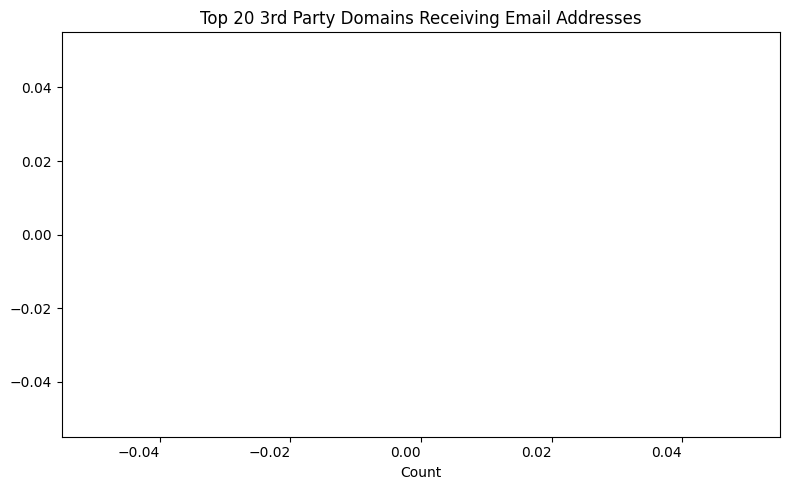

In [4]:
df = pd.DataFrame(results, columns=['Domain', 'Count', 'HashType'])

color_map = {
    'plain': '#ff7f0e',
    'SHA256': '#1f77b4'
}

# Map colors to hash types
df['Color'] = df['HashType'].map(color_map)

# Select top 20 domains
df_top20 = df.head(14)

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(df_top20['Domain'], df_top20['Count'], color=df_top20['Color'])
plt.title('Top 20 3rd Party Domains Receiving Email Addresses')
plt.xlabel('Count')
plt.ylabel('')
plt.xticks(fontsize='medium', ha='right')
plt.tight_layout()

legend_elements = [Patch(facecolor=color_map[key], label=key) for key in color_map]
plt.legend(handles=legend_elements, title='Hash Type')

plt.show()


### Websites with most shared mail addresses

In [44]:
dbConnect = sqlite3.connect('../third_party_analysis.db')
dbCursor = dbConnect.cursor()

query = "SELECT host, COUNT(*) FROM EmailHashes GROUP BY host ORDER BY COUNT(*) DESC"
dbCursor.execute(query)
results1 = dbCursor.fetchall()

for domain, count in results1:
    print(f"{count}\t{domain}")

dbConnect.close()

198	sephora.de
62	depot-online.de
12	telegraph.co.uk
7	uniqlo.com
4	thehindu.com
2	faz.net
1	merkur.de


**Visualization**

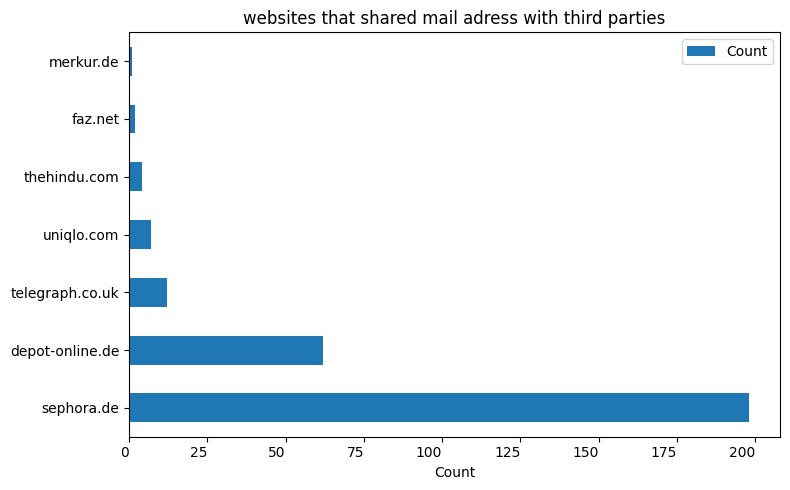

In [45]:
df = pd.DataFrame(results1, columns=['Host', 'Count'])

df_top20 = df.head(15)

df_top20.plot(kind='barh', x='Host', y='Count', figsize=(8, 5))

plt.title('websites that shared mail adress with third parties')
plt.xlabel('Count')
plt.ylabel('')

plt.xticks( fontsize='medium', ha='right')

plt.tight_layout()
plt.show()

### Example: Sephora

In [46]:
dbConnect = sqlite3.connect('../third_party_analysis.db')
dbCursor = dbConnect.cursor()

query = "SELECT domain, COUNT(*) FROM EmailHashes WHERE host = 'sephora.de' GROUP BY domain ORDER BY COUNT(*) DESC"
dbCursor.execute(query)
results2 = dbCursor.fetchall()

for domain, count in results2:
    print(f"{count}\t{domain}")

dbConnect.close()

96	www.facebook.com
30	ct.pinterest.com
17	region1.google-analytics.com
14	region1.analytics.google.com
10	collect.commander1.com
8	sslwidget.criteo.com
8	serv-api.target2sell.com
7	tr.snapchat.com
5	p.cquotient.com
2	02179915.akstat.io
1	widget.eu.criteo.com


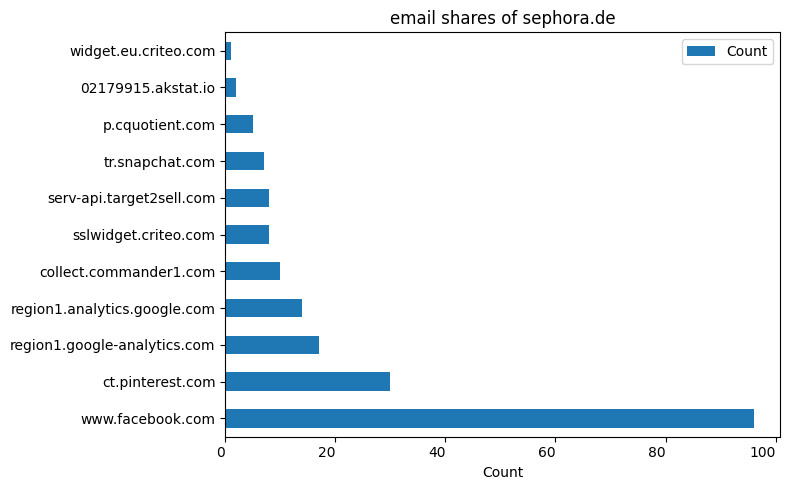

In [47]:
df = pd.DataFrame(results2, columns=['Domain', 'Count'])

df_top20 = df.head(25)

df_top20.plot(kind='barh', x='Domain', y='Count', figsize=(8, 5))

plt.title('email shares of sephora.de')
plt.xlabel('Count')
plt.ylabel('')

plt.xticks( fontsize='medium', ha='right')

plt.tight_layout()
plt.show()

# Comparison

### News vs Shops

In [48]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT website_type, COUNT(*) FROM EmailHashes GROUP BY website_type ORDER BY COUNT(*) DESC'

cursor.execute(query)

data4 = cursor.fetchall()

print("Count\twebsite type")
print("----------------------------")
for domain, count in data4:
    print(f"{count}\t{domain}")

conn.close()

Count	website type
----------------------------
267	shops
19	news


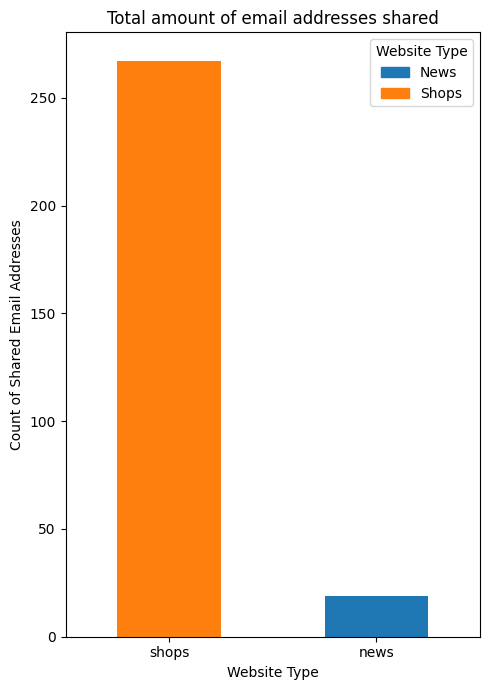

In [49]:
df = pd.DataFrame(data4, columns=['Website Type', 'Count'])

colors = ['#1f77b4' if website_type == 'news' else '#ff7f0e' for website_type in df['Website Type']]
df.plot(kind='bar', x='Website Type', y='Count', color=colors, figsize=(5, 7))

news_patch = mpatches.Patch(color='#1f77b4', label='News')
other_patch = mpatches.Patch(color='#ff7f0e', label='Shops')

plt.legend(handles=[news_patch, other_patch], title='Website Type')
plt.title('Total amount of email addresses shared')
plt.ylabel('Count of Shared Email Addresses')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Mobile vs Desktop

In [50]:
conn = sqlite3.connect('../third_party_analysis.db')
cursor = conn.cursor()

query = 'SELECT device_type, COUNT(*) FROM EmailHashes GROUP BY device_type ORDER BY COUNT(*) DESC'

cursor.execute(query)

data5 = cursor.fetchall()

print("Count\tdevice type")
print("----------------------------")
for domain, count in data4:
    print(f"{count}\t{domain}")

conn.close()

Count	device type
----------------------------
267	shops
19	news


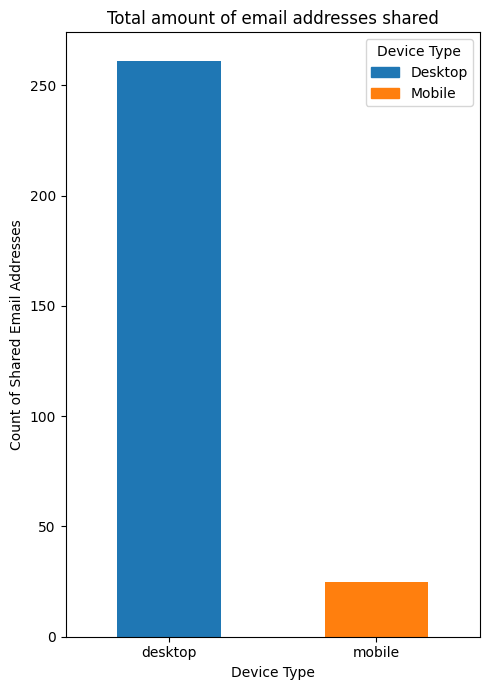

In [51]:
df = pd.DataFrame(data5, columns=['Device Type', 'Count'])

colors = ['#1f77b4' if website_type == 'desktop' else '#ff7f0e' for website_type in df['Device Type']]
df.plot(kind='bar', x='Device Type', y='Count', color=colors, figsize=(5, 7))

news_patch = mpatches.Patch(color='#1f77b4', label='Desktop')
other_patch = mpatches.Patch(color='#ff7f0e', label='Mobile')

plt.legend(handles=[news_patch, other_patch], title='Device Type')
plt.title('Total amount of email addresses shared')
plt.ylabel('Count of Shared Email Addresses')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()